In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

import umap

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap
import os
import time
%matplotlib inline

In [3]:
### PCs over time:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210130_superv_depth_correction/20210214_temporal.npy'
temporal = np.load(file)
temporal.shape #time by pc

(30456, 1000)

In [ ]:
for n_neighbors in [3,5,7,10,20,30,50,70,100,150,200,400]:
    print(f'***{n_neighbors} neighbors ***')
    for num_pcs in [1,3,5,10,20,30,50,100,150,200,500,1000]:
        print(f'{num_pcs}')
        t0 = time.time()
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0)
        embedding = reducer.fit_transform(temporal[:,:num_pcs])
        print('Duration: {}'.format(time.time()-t0))
        
        plt.figure(figsize=(10,10))
        for i in range(9):
            
            start = i*3384
            stop = (i+1)*3384
            plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)
            plt.title(F'num_pcs:{num_pcs} | n_neigh:{n_neighbors}',fontsize=16)
            plt.axis('off')

        save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
        timestr = time.strftime("%Y%m%d-%H%M%S" + F'_{num_pcs}pcs_{n_neighbors}neighbors')
        fname = os.path.join(save_path, f'{timestr}')
        plt.savefig(fname,dpi=300,bbox_inches='tight')

***3 neighbors ***
1
Duration: 35.93208932876587
3


In [6]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:500])

/home/users/brezovec/.local/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/users/brezovec/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.local/lib/python3.6/site-packages/umap/utils.

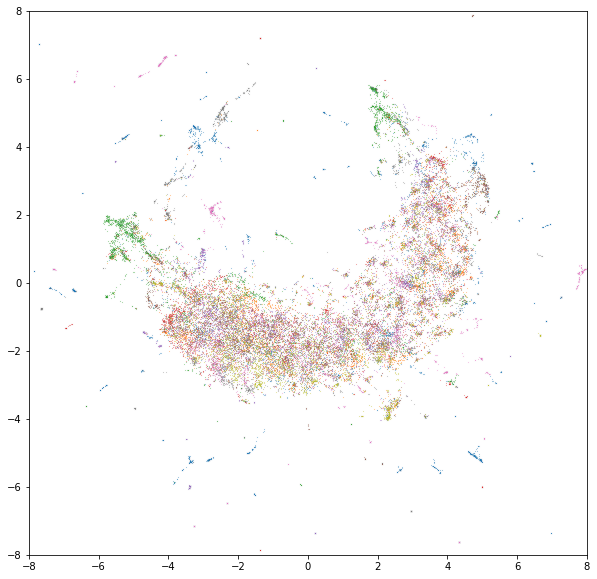

In [22]:
plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    #plt.plot(embedding[start:stop,0], embedding[start:stop,1], marker='x',markersize=.1,lw=.1)
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1],marker='x',s=.01)
plt.ylim(-8,8)
plt.xlim(-8,8)
#plt.legend()
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [24]:
embedding.shape

(30456, 2)

In [26]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210224_umap/20210224_embeddings_500pc_5nei'
np.save(save_file, embedding)

In [49]:
min_cluster_size=10
min_samples=30
cluster_selection_epsilon=.1
t0 = time.time()
clustered = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                    min_samples=min_samples,
                                    cluster_selection_epsilon=cluster_selection_epsilon,
                                    cluster_selection_method='leaf').fit(embedding)
print(time.time()-t0)
print('{} clusters'.format(len(np.unique(clustered.labels_))))
percent_embedded = (1-(len(np.where(clustered.labels_==-1)[0])/30456))*100
print('{:0.0f}% embedded'.format(percent_embedded))

7.296802759170532
117 lusters
66% embedded


In [193]:
fwd = []
rev = []
rot_pos = []
rot_neg = []
accel = []
for fly in flies:
    fwd.extend(flies[fly].fictrac.fictrac['Y'])
    rev.extend(flies[fly].fictrac.fictrac['Y_neg'])
    rot_pos.extend(flies[fly].fictrac.fictrac['Z_pos'])
    rot_neg.extend(flies[fly].fictrac.fictrac['Z_neg'])
    accel.extend(flies[fly].fictrac.fictrac['Ya_pos'])
fwd = np.asarray(fwd)
rev = np.asarray(rev)
rot_pos = np.asarray(rot_pos)
rot_neg = np.asarray(rot_neg)
accel = np.asarray(accel)

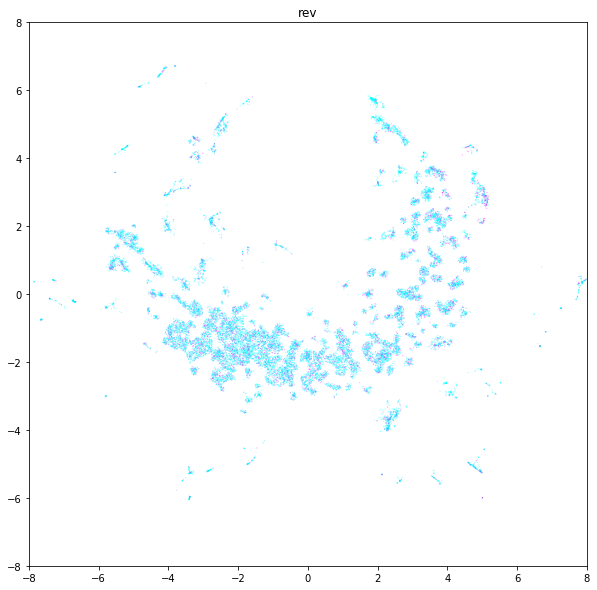

In [196]:
plt.figure(figsize=(10,10))

cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, len(np.unique(clustered.labels_))))

for cluster in range(len(np.unique(clustered.labels_))):
    indicies = np.where(clustered.labels_==cluster)
    #plt.scatter(embedding[indicies,0], embedding[indicies,1],marker='x',s=.01,color=colors[cluster])
    plt.scatter(np.reshape(embedding[indicies,0],-1), np.reshape(embedding[indicies,1],-1),
                marker='x',s=.01,c=list(rev[indicies[0]]),vmin=0,vmax=.002,cmap='cool')

#     if cluster == 100:
#     #plt.scatter(embedding[indicies,0], embedding[indicies,1],marker='o',s=10)
#         plt.plot([embedding[indicies[0]-1,0], embedding[indicies[0],0]],
#                  [embedding[indicies[0]-1,1], embedding[indicies[0],1]],
#                  color='k',lw=1)

#         plt.plot([embedding[indicies[0]+1,0], embedding[indicies[0],0]],
#                  [embedding[indicies[0]+1,1], embedding[indicies[0],1]],
#                  color=colors[cluster],lw=1)

plt.ylim(-8,8)
plt.xlim(-8,8)
plt.title('rev')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S_")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

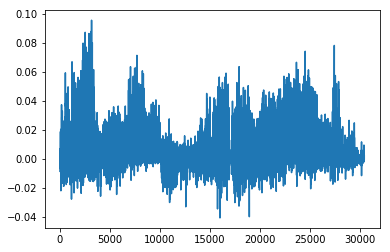

In [168]:
plt.plot(fwd)

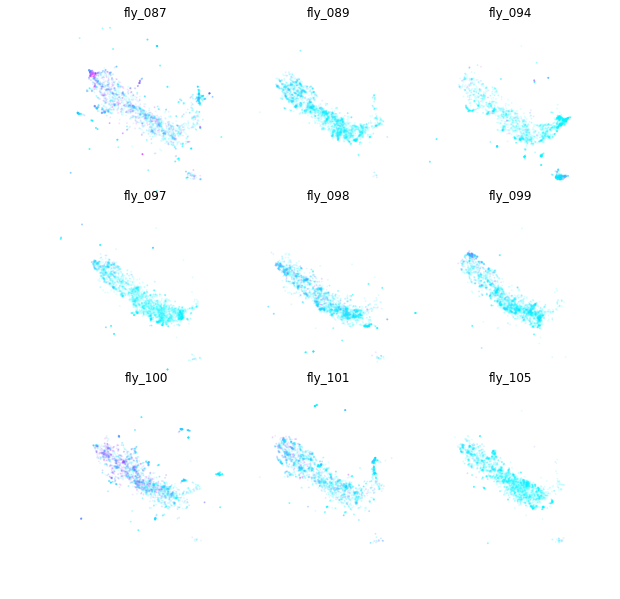

In [89]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=.05)

for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    grid[i].scatter(embedding[start:stop,0], embedding[start:stop,1], s=1, c=accel[start:stop],vmin=0,vmax=.002,cmap='cool',alpha=.1)
    #grid[i].plot(embedding[start:stop,0], embedding[start:stop,1], lw=.1)
    grid[i].set_xlim(-10,10)
    grid[i].set_ylim(-10,10)
    grid[i].axis('off')
    grid[i].set_title(fly_names[i],fontsize=12)

#plt.suptitle('10 PCs, 10 neigbors, fwd')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

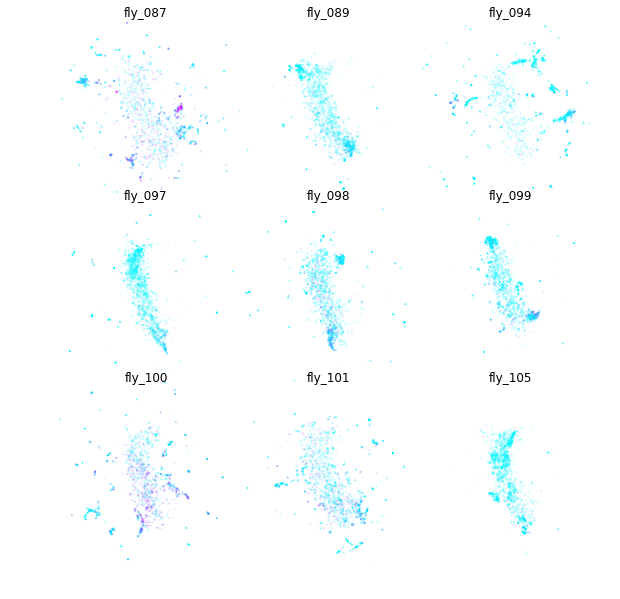

In [87]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=.05)

for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    grid[i].scatter(embedding[start:stop,0], embedding[start:stop,1], s=1, c=accel[start:stop],vmin=0,vmax=.002,cmap='cool',alpha=.1)
    #grid[i].plot(embedding[start:stop,0], embedding[start:stop,1], lw=.1)
    grid[i].set_xlim(-10,10)
    grid[i].set_ylim(-10,10)
    grid[i].axis('off')
    grid[i].set_title(fly_names[i],fontsize=12)

#plt.suptitle('10 PCs, 10 neigbors, fwd')
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

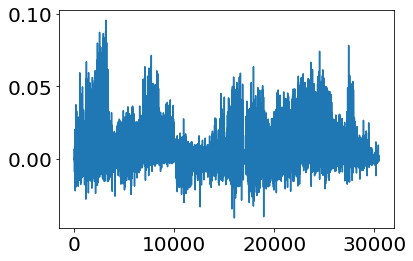

In [97]:
plt.plot(fwd)

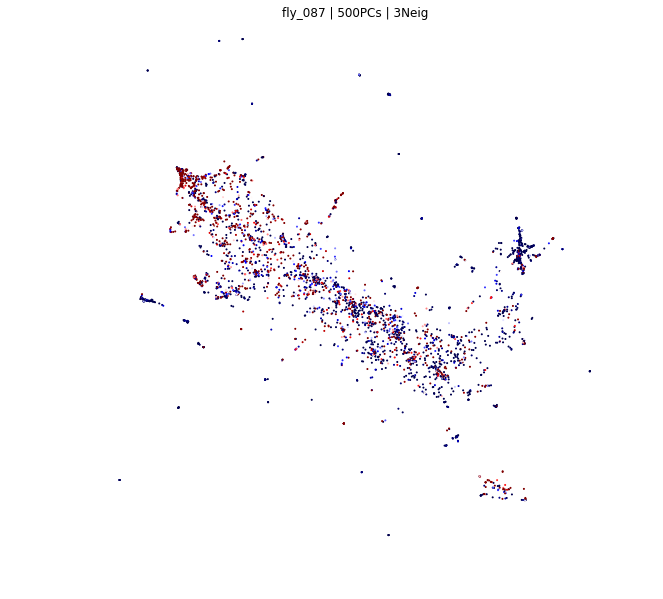

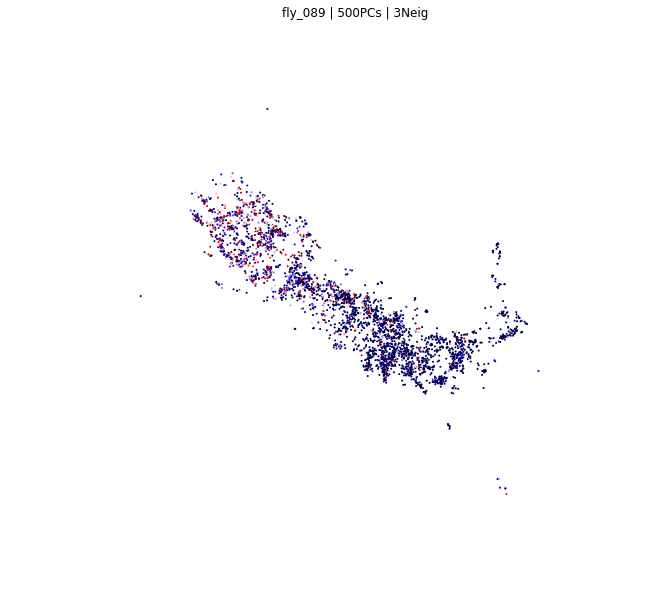

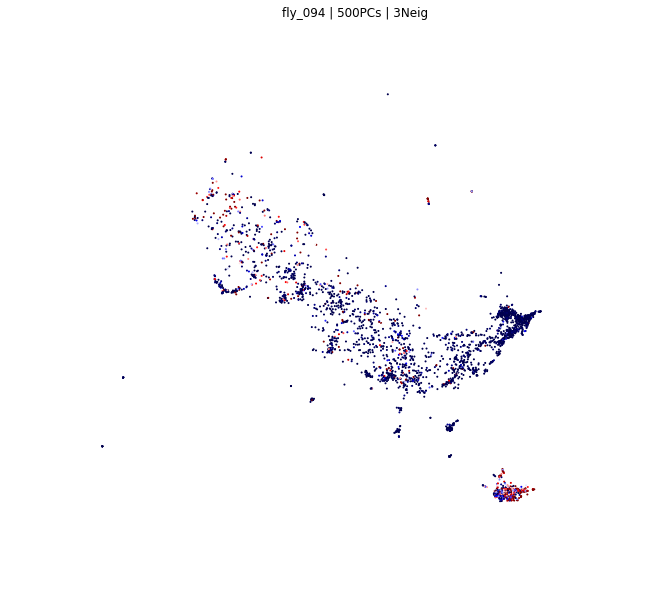

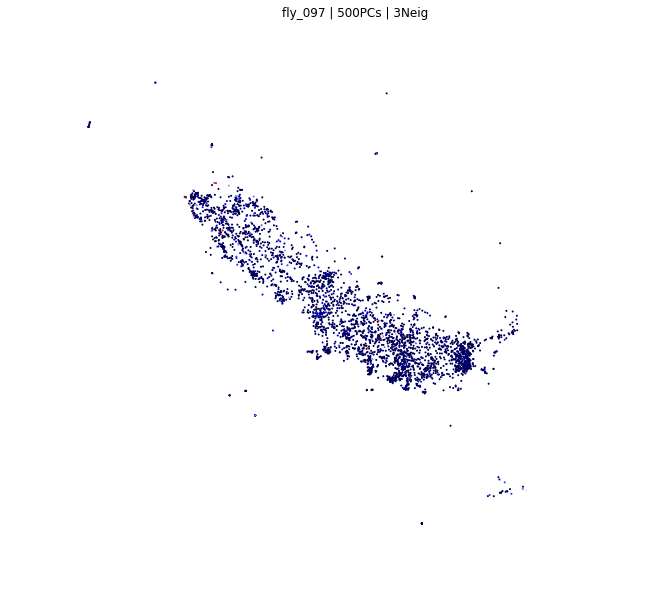

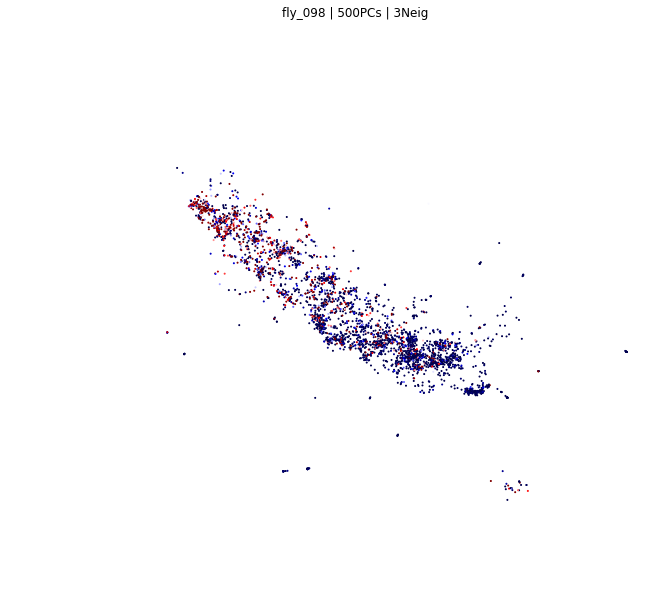

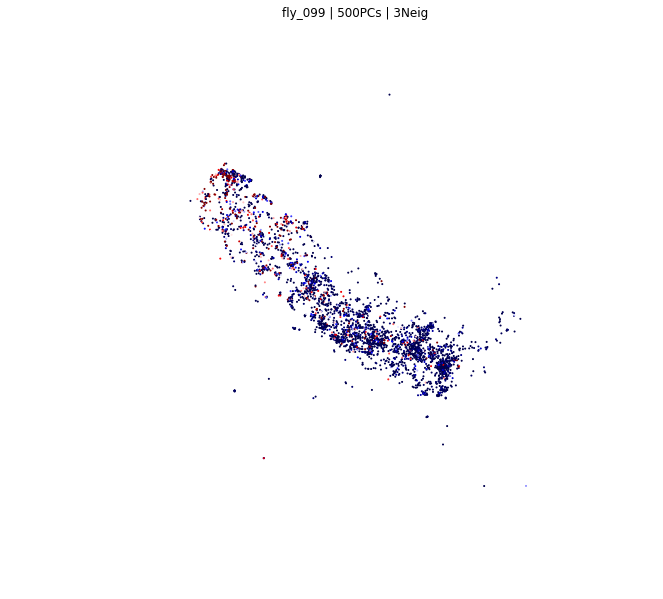

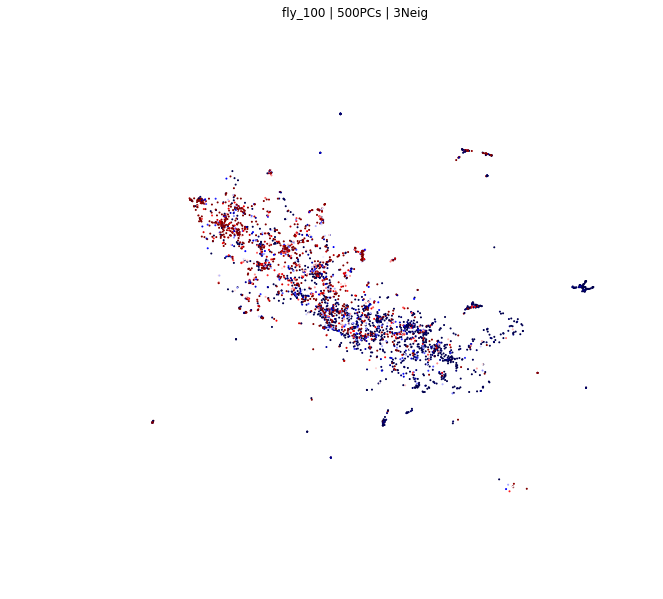

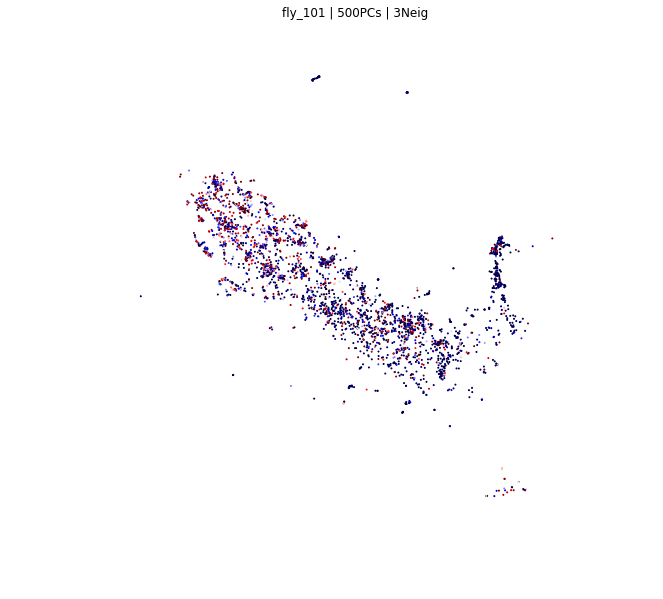

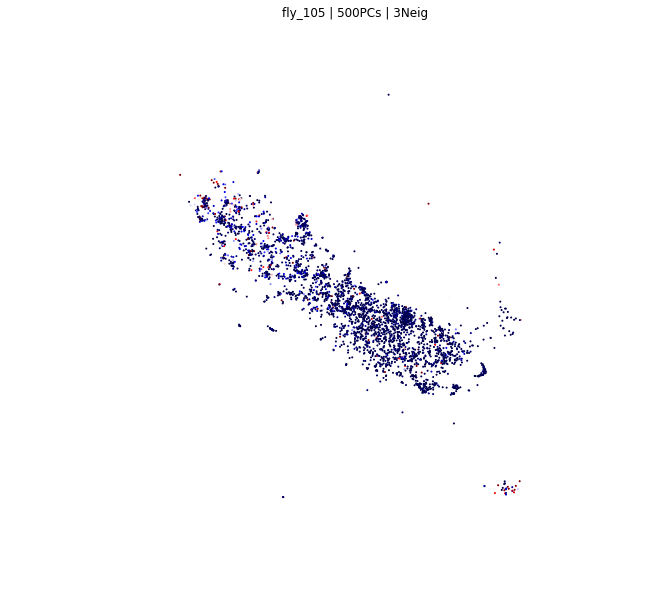

In [106]:
for i in range(9):
    plt.figure(figsize=(10,10))
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1],s=1,c=fwd[start:stop],vmin=0,vmax=.02,cmap='seismic')
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    plt.axis('off')
    plt.title(fly_names[i] + ' | 500PCs | 3Neig',fontsize=12)
    
    save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fname = os.path.join(save_path, f'{timestr}')
    plt.savefig(fname,dpi=300,bbox_inches='tight')

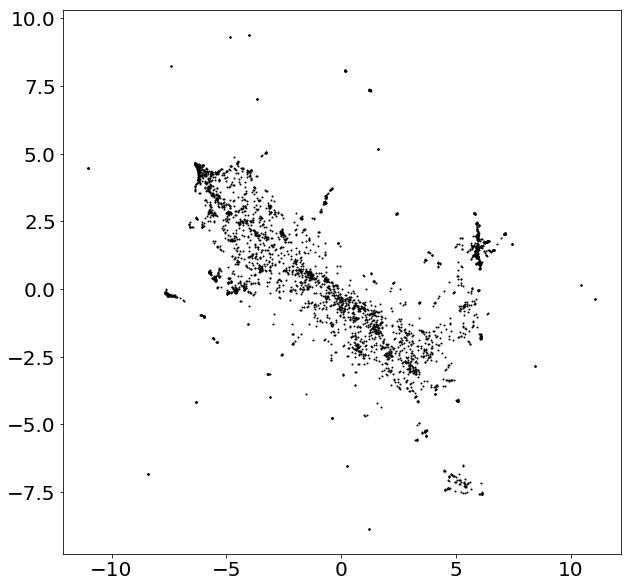

In [93]:
plt.figure(figsize=(10,10))
for i in range(1):
    start = i*3384
    stop = (i+1)*3384
    #plt.plot(embedding[start:stop,0], embedding[start:stop,1],lw=.1)
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1],s=1,color='k')

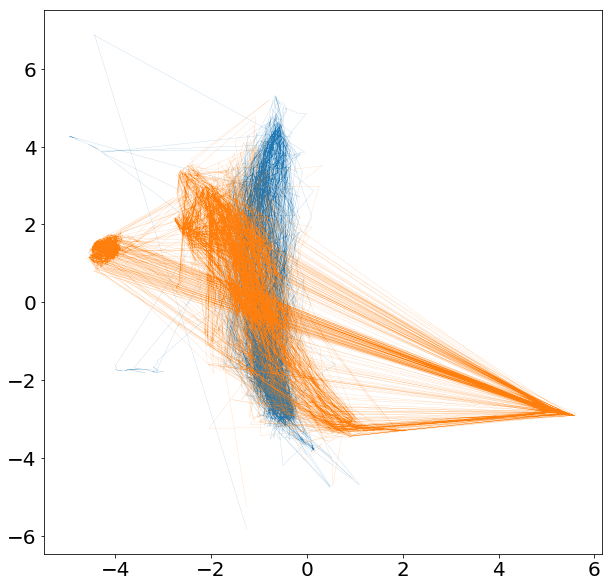

In [38]:
plt.figure(figsize=(10,10))
i=3
start = i*3384
stop = (i+1)*3384
plt.plot(embedding[start:stop,0], embedding[start:stop,1],lw=.1)

i=6
start = i*3384
stop = (i+1)*3384
plt.plot(embedding[start:stop,0], embedding[start:stop,1],lw=.1)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [11]:
from matplotlib.patches import FancyArrowPatch

(-10.134662553668022,
 9.865337446331978,
 -10.117404997348785,
 9.882595002651215)

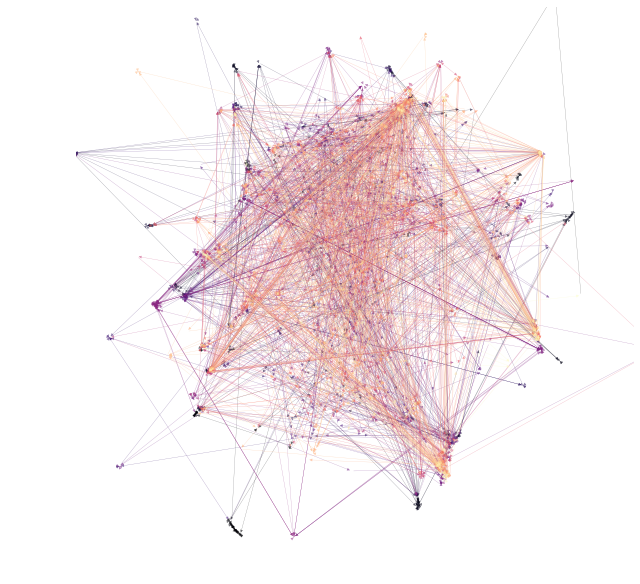

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cmap = plt.cm.magma
for i in range(3384):
    alpha = .5
    #color='#000000'
    color = cmap(float(i+1) / 3384)
    a = FancyArrowPatch(embedding[i,start:stop],embedding[i+1,start:stop],
                        mutation_scale=6,lw=0.25,arrowstyle="-|>",
                        color=color,alpha=alpha)
    ax.add_artist(a)

window = 10
center = np.mean(embedding[:,start:stop],axis=0)
ax.set_xlim(center[0]-window,center[0]+window)
ax.set_ylim(center[1]-window,center[1]+window)
plt.axis('off')

Duration: 62.251140117645264


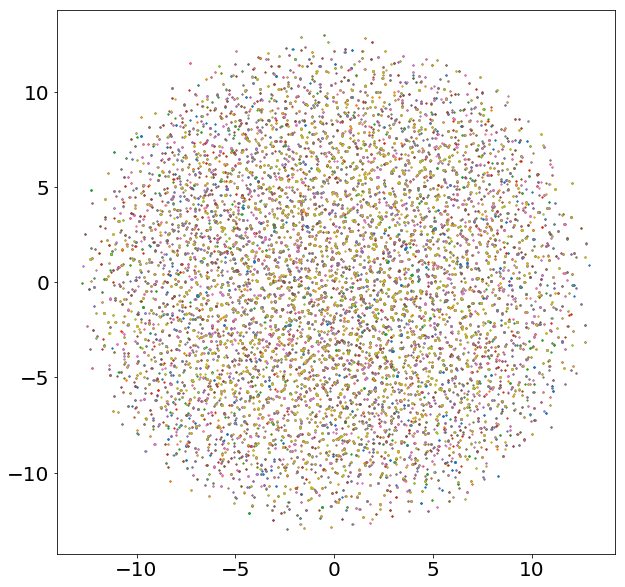

In [42]:
n_neighbors = 2
num_pcs = 3

t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)

Duration: 103.1279091835022


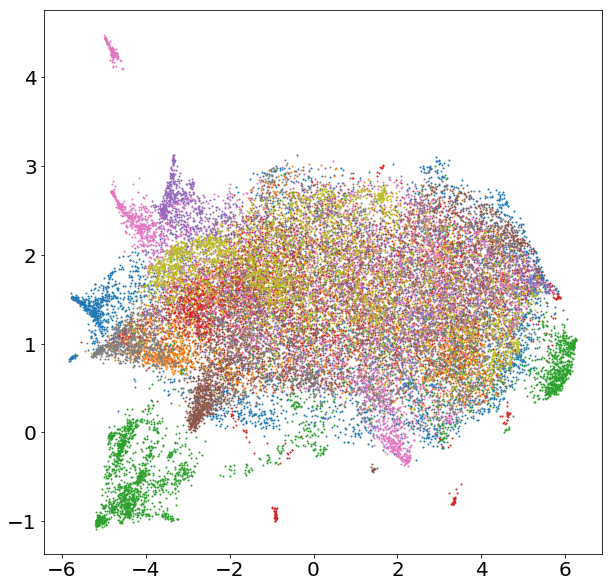

In [34]:
n_neighbors = 100
num_pcs = 30

t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)

Duration: 33.12478065490723


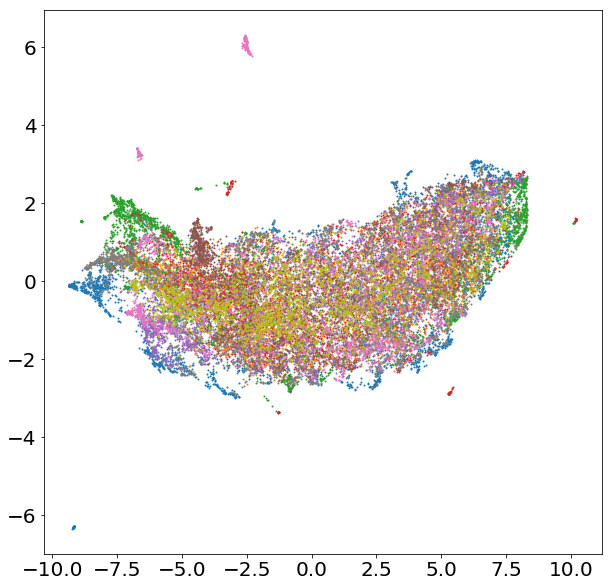

In [32]:
n_neighbors = 10
num_pcs = 10

t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)

Duration: 40.437769174575806


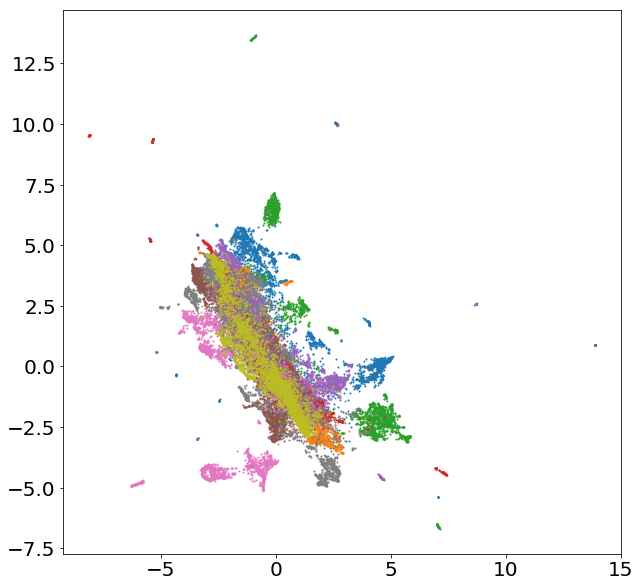

In [31]:
n_neighbors = 10
num_pcs = 100

t0 = time.time()
reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:num_pcs])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)

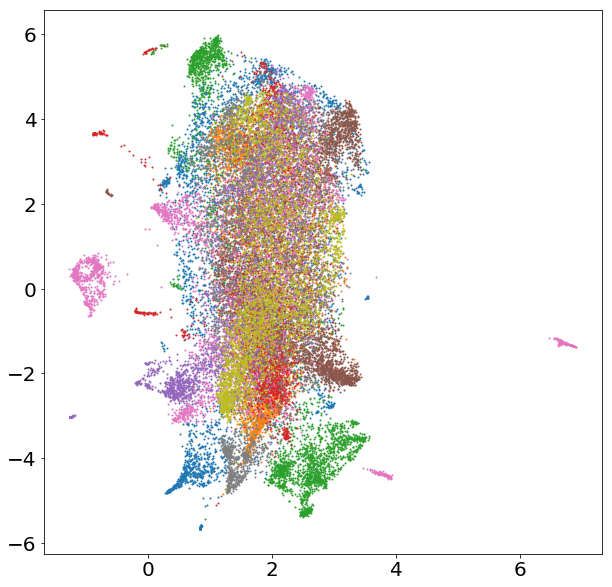

In [30]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=60, min_dist=0)
embedding = reducer.fit_transform(temporal[:,:100])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
for i in range(9):
    start = i*3384
    stop = (i+1)*3384
    plt.scatter(embedding[start:stop,0], embedding[start:stop,1], s=1)

In [129]:
def load_fictrac(directory, file='fictrac.dat'):
    """ Loads fictrac data from .dat file that fictrac outputs.
    To-do: change units based on diameter of ball etc.
    For speed sanity check, instead remove bad frames so we don't have to throw out whole trial.
    Parameters
    ----------
    directory: string of full path to file
    file: string of file name
    Returns
    -------
    fictrac_data: pandas dataframe of all parameters saved by fictrac """

    for item in os.listdir(directory):
        if '.dat' in item:
            file = item

    with open(os.path.join(directory, file),'r') as f:
        df = pd.DataFrame(l.rstrip().split() for l in f)

        # Name columns
        df = df.rename(index=str, columns={0: 'frameCounter',
                                       1: 'dRotCamX',
                                       2: 'dRotCamY',
                                       3: 'dRotCamZ',
                                       4: 'dRotScore',
                                       5: 'dRotLabX',
                                       6: 'dRotLabY',
                                       7: 'dRotLabZ',
                                       8: 'AbsRotCamX',
                                       9: 'AbsRotCamY',
                                       10: 'AbsRotCamZ',
                                       11: 'AbsRotLabX',
                                       12: 'AbsRotLabY',
                                       13: 'AbsRotLabZ',
                                       14: 'positionX',
                                       15: 'positionY',
                                       16: 'heading',
                                       17: 'runningDir',
                                       18: 'speed',
                                       19: 'integratedX',
                                       20: 'integratedY',
                                       21: 'timeStamp',
                                       22: 'sequence'})

        # Remove commas
        for column in df.columns.values[:-1]:
            df[column] = [float(x[:-1]) for x in df[column]]

        fictrac_data = df
                
    # sanity check for extremely high speed (fictrac failure)
    speed = np.asarray(fictrac_data['speed'])
    max_speed = np.max(speed)
    if max_speed > 10:
        raise Exception('Fictrac ball tracking failed (reporting impossibly high speed).')
    return fictrac_data

def load_timestamps(directory, file='functional.xml'):
    """ Parses a Bruker xml file to get the times of each frame, or loads h5py file if it exists.
    First tries to load from 'timestamps.h5' (h5py file). If this file doesn't exist
    it will load and parse the Bruker xml file, and save the h5py file for quick loading in the future.
    Parameters
    ----------
    directory: full directory that contains xml file (str).
    file: Defaults to 'functional.xml'
    Returns
    -------
    timestamps: [t,z] numpy array of times (in ms) of Bruker imaging frames.
    """
    try:
        print('Trying to load timestamp data from hdf5 file.')
        with h5py.File(os.path.join(directory, 'timestamps.h5'), 'r') as hf:
            timestamps = hf['timestamps'][:]

    except:
        print('Failed. Extracting frame timestamps from bruker xml file.')
        xml_file = os.path.join(directory, file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        timestamps = []
        
        sequences = root.findall('Sequence')
        for sequence in sequences:
            frames = sequence.findall('Frame')
            for frame in frames:
                filename = frame.findall('File')[0].get('filename')
                time = float(frame.get('relativeTime'))
                timestamps.append(time)
        timestamps = np.multiply(timestamps, 1000)

        if len(sequences) > 1:
            timestamps = np.reshape(timestamps, (len(sequences), len(frames)))
        else:
            timestamps = np.reshape(timestamps, (len(frames), len(sequences)))

        ### Save h5py file ###
        with h5py.File(os.path.join(directory, 'timestamps.h5'), 'w') as hf:
            hf.create_dataset("timestamps", data=timestamps)
    
    print('Success.')
    return timestamps

class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model_labels, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)

            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1

            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)

            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

In [131]:
import h5py
import pandas as pd
import scipy
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

In [132]:
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
z=20

###################
### Build Flies ###
###################
flies = {}
for i, fly in enumerate(fly_names):
    flies[fly] = Fly(fly_name=fly, fly_idx=i)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)

Trying to load timestamp data from hdf5 file.
Success.


/home/users/brezovec/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.
Trying to load timestamp data from hdf5 file.
Success.


In [133]:
fwd = []
rot_pos = []
rot_neg = []
accel = []
for fly in flies:
    fwd.extend(flies[fly].fictrac.fictrac['Y'])
    rot_pos.extend(flies[fly].fictrac.fictrac['Z_pos'])
    rot_neg.extend(flies[fly].fictrac.fictrac['Z_neg'])
    accel.extend(flies[fly].fictrac.fictrac['Ya_pos'])

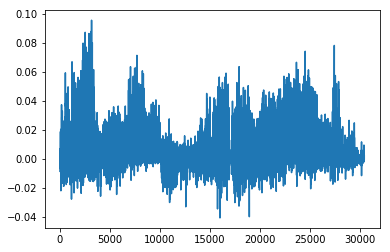

In [135]:
plt.plot(fwd)

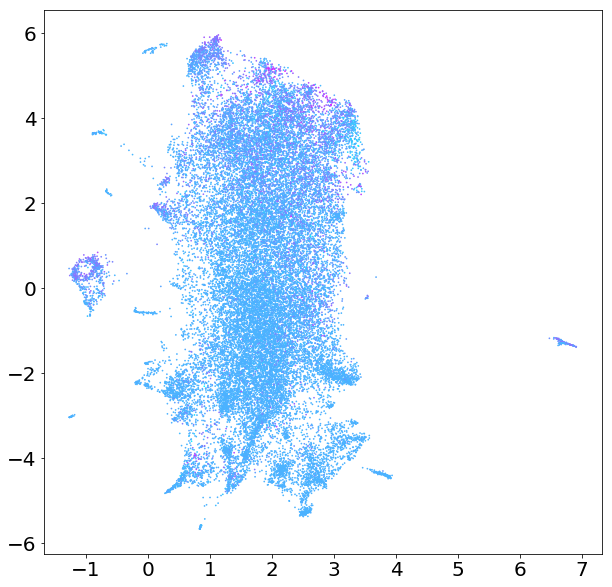

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], c=fwd, s=.5,cmap='cool')

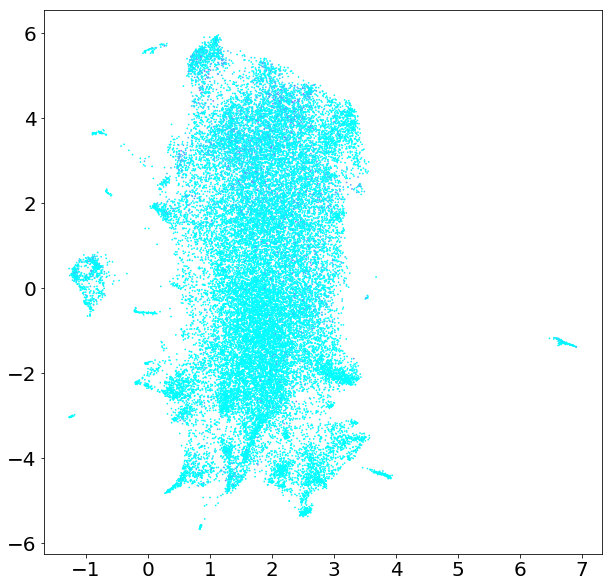

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], c=rot, s=.5,cmap='cool')